## Jupyter Notebook Dallas RUG Oct. 20, 2018
### Data Wrangling - Chicago Crime Data

In [82]:
## Load packages
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [83]:
## Load in the first file
df1 = pd.read_csv("data/Chicago_Crimes_2015.csv", encoding='utf-8')

In [84]:
#Examine the top 2 rows of the data frame
df1.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude
0,10508693,HZ250496,5/3/2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,5/10/2016 15:56,41.864073,-87.706819
1,10508695,HZ250409,5/3/2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,5/10/2016 15:56,41.782922,-87.604363


In [85]:
#Python does not like blank spaces, specially in the column names
df1.columns = df1.columns.str.replace(" ", "_")

In [86]:
df1.head(2)

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,District,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude
0,10508693,HZ250496,5/3/2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,5/10/2016 15:56,41.864073,-87.706819
1,10508695,HZ250409,5/3/2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,5/10/2016 15:56,41.782922,-87.604363


In [87]:
## Load in the second file
df2 = pd.read_csv("data/Chicago_Crimes_2016.csv", encoding='utf-8')
df2.columns = df2.columns.str.replace(" ", "_")

In [88]:
## Bind rows to combine the two data frames
df = pd.concat([df1, df2])
del df1, df2 #delete the original data frames to free-up memory

In [89]:
df.shape

(2097150, 21)

### Clean and Format data

In [90]:
## Remove columns
df = df.drop(['IUCR', 'X_Coordinate', 'Y_Coordinate'], axis=1)

## Rename columns
df = df.rename(columns={"Date": "Datetime"})

In [91]:
df.shape

(2097150, 18)

In [92]:
df.head(2)

,ID,Case_Number,Datetime,Block,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year,Updated_On,Latitude,Longitude
0,10508693,HZ250496,5/3/2016 23:40,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,5/10/2016 15:56,41.864073,-87.706819
1,10508695,HZ250409,5/3/2016 21:40,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,5/10/2016 15:56,41.782922,-87.604363


In [93]:
## Change data type for ID
def trim_fraction(text):
    if '.0' in text:
        return text[:text.rfind('.0')]
    return text
df['ID'] = df['ID'].astype('str')
df.ID = df.ID.apply(trim_fraction)

In [94]:
df.head(2)

,ID,Case_Number,Datetime,Block,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year,Updated_On,Latitude,Longitude
0,10508693,HZ250496,5/3/2016 23:40,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,5/10/2016 15:56,41.864073,-87.706819
1,10508695,HZ250409,5/3/2016 21:40,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,5/10/2016 15:56,41.782922,-87.604363


In [95]:
## Change data types for all columns
df['Case_Number'] = df['Case_Number'].astype(str)
df['Datetime'] = df['Datetime'].astype(str)
df['Block'] = df['Block'].astype(str)
df['Primary_Type'] = df['Primary_Type'].astype(str)
df['Description'] = df['Description'].astype(str)
df['Location_Description'] = df['Location_Description'].astype(str)
df['Arrest'] = df['Arrest'].astype(str)
df['Domestic'] = df['Domestic'].astype(str)
df['Beat'] = pd.to_numeric(df['Beat'], errors='coerce')
df['District'] = pd.to_numeric(df['District'], errors='coerce')
df['Ward'] = pd.to_numeric(df['Ward'], errors='coerce')
df['Community_Area'] = pd.to_numeric(df['Community_Area'], errors='coerce')
df['FBI_Code'] = df['FBI_Code'].astype(str)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Updated_On'] = df['Updated_On'].astype(str)
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

In [96]:
### Create datetimes

df['Datetime'] = pd.to_datetime(df['Datetime'], format="%m/%d/%Y %H:%M", errors='coerce') # Will not work without coerce... R does this automatically
df['Updated_On'] = pd.to_datetime(df['Updated_On'], format="%m/%d/%Y %H:%M", errors='coerce')

In [97]:
df.Datetime.head(2)

0   2016-05-03 23:40:00
1   2016-05-03 21:40:00
Name: Datetime, dtype: datetime64[ns]

In [98]:
### Create additional columns from datetime

## Month name
df['Month'] = df['Datetime'].dt.strftime('%B')

## Month Number
df['Month_Value'] = df['Datetime'].dt.month

## Year-Month
df['Year_Month'] = df['Datetime'].dt.strftime('%Y-%m')

## Hour
df['Hour'] = df['Datetime'].dt.hour

In [99]:
df.shape

(2097150, 22)

In [100]:
## Create unique identifier
df['Identifier'] = df['ID'] + '-' + df['Case_Number']

## Remove duplicates
df = df.sort_values(['Updated_On'], ascending=False)
df = df.drop_duplicates('Identifier')

In [101]:
df.shape

(1048575, 23)

In [102]:
df.head(2)

,ID,Case_Number,Datetime,Block,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,...,FBI_Code,Year,Updated_On,Latitude,Longitude,Month,Month_Value,Year_Month,Hour,Identifier
21968,10540332,HZ285468,2016-05-30 00:25:00,018XX W PATTERSON AVE,ROBBERY,ARMED: HANDGUN,STREET,True,False,1922,...,3,2016,2017-01-25 15:52:00,41.947829,-87.675198,May,5,2016-05,0,10540332-HZ285468
20738,10540215,HZ285367,2016-05-29 23:35:00,039XX N RAVENSWOOD AVE,ROBBERY,ARMED: HANDGUN,STREET,True,False,1922,...,3,2016,2017-01-25 15:52:00,41.953062,-87.674177,May,5,2016-05,23,10540215-HZ285367


In [103]:
#### Crime rate per month per District

## Get crime counts for each Primary Type 
dfDistrict = df.groupby(['Year_Month', 'District', 'Primary_Type']).size().reset_index()
dfDistrict = dfDistrict.rename(columns={0:'Numerator'})
dfDistrict['ID'] = dfDistrict['Year_Month'] + ' ' + dfDistrict['District'].astype(str)

In [104]:
## Get crime counts for each month
dfMonth = df.groupby(['Year_Month', 'District']).size().reset_index()
dfMonth = dfMonth.rename(columns={0:'Denominator'})
dfMonth['ID'] = dfMonth['Year_Month'] + ' ' + dfMonth['District'].astype(str)
dfMonth = dfMonth[['ID', 'Denominator']]

In [105]:
## Join to get numerator and denominator together
dfJoin = pd.merge(dfDistrict, dfMonth, how='left')
dfJoin['Crime_Rate'] = dfJoin['Numerator']/dfJoin['Denominator'] * 100

### Visualization - Plots

In [106]:
## ## Prepare data frame for Theft from January 2015 onwards
dfPrimaryType = dfJoin[(dfJoin['Primary_Type'] == "THEFT")].reset_index()
dfPrimaryType = dfPrimaryType[(dfPrimaryType['Year_Month'] > "2014-12")]

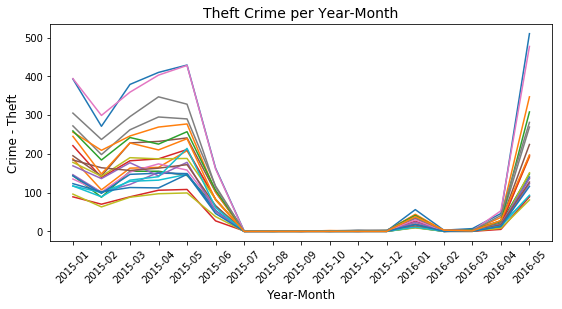

In [107]:
## Crime frequency - theft
plt.figure(figsize=(9, 4))
dfCrimeFreq = dfPrimaryType.pivot(index='Year_Month', columns='District', values='Numerator')
dfCrimeFreq = dfCrimeFreq.reset_index()
dfCrimeFreq.fillna(0, inplace=True)
x = list(range(dfCrimeFreq.shape[0]))
y = dfCrimeFreq.drop(['Year_Month'], axis=1)
plt.plot(x, y)
xticks = dfCrimeFreq['Year_Month']
plt.xticks(x, xticks, rotation=45)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Crime - Theft', fontsize=12)
plt.title("Theft Crime per Year-Month", fontsize=14)
plt.show()
plt.show()

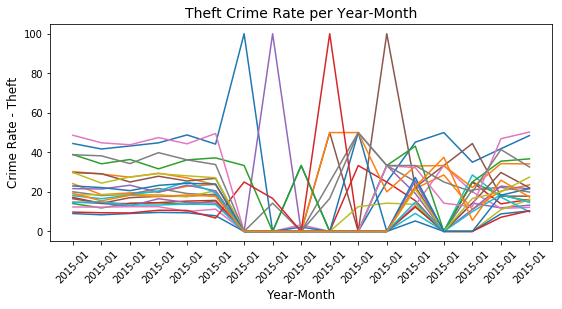

In [108]:
## Crime rate - theft
plt.figure(figsize=(9, 4))
dfCrimeRate = dfPrimaryType.pivot(index='Year_Month', columns='District', values='Crime_Rate')
dfCrimeRate = dfCrimeRate.reset_index()
dfCrimeRate.fillna(0, inplace=True)
x = list(range(dfCrimeRate.shape[0]))
y = dfCrimeRate.drop(['Year_Month'], axis=1)
plt.plot(x, y)
xticks = dfPrimaryType['Year_Month']
plt.xticks(x, xticks, rotation=45)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Crime Rate - Theft', fontsize=12)
plt.title("Theft Crime Rate per Year-Month", fontsize=14)
plt.show()